# Basic Statistics-2 

### Question 1

 Look at the data given below. Plot the data, find the outliers and find out  μ,σ,σ^2

Name of company	Measure X
Allied Signal	24.23%
Bankers Trust	25.53%
General Mills	25.41%
ITT Industries	24.14%
J.P.Morgan & Co.	29.62%
Lehman Brothers	28.25%
Marriott	25.81%
MCI	24.39%
Merrill Lynch	40.26%
Microsoft	32.95%
Morgan Stanley	91.36%
Sun Microsystems	25.99%
Travelers	39.42%
US Airways	26.71%
Warner-Lambert	35.00%

#### Saved the data in csv file


In [81]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [82]:
df=pd.read_csv('company.csv')

In [83]:
df

,Name of company,Measure X
0,Allied Signal,24.23%
1,Bankers Trust,25.53%
2,General Mills,25.41%
3,ITT Industries,24.14%
4,J.P.Morgan & Co.,29.62%
5,Lehman Brothers,28.25%
6,Marriott,25.81%
7,MCI,24.39%
8,Merrill Lynch,40.26%
9,Microsoft,32.95%


In [84]:
df.columns

Index(['Name of company', 'Measure X'], dtype='object')

In [85]:
df.head(2)

,Name of company,Measure X
0,Allied Signal,24.23%
1,Bankers Trust,25.53%


In [86]:
percent_col=pd.to_numeric(df['Measure X'].str.replace('%', ''), 'ignore')/100
df['percent']=percent_col

In [87]:
df

,Name of company,Measure X,percent
0,Allied Signal,24.23%,0.2423
1,Bankers Trust,25.53%,0.2553
2,General Mills,25.41%,0.2541
3,ITT Industries,24.14%,0.2414
4,J.P.Morgan & Co.,29.62%,0.2962
5,Lehman Brothers,28.25%,0.2825
6,Marriott,25.81%,0.2581
7,MCI,24.39%,0.2439
8,Merrill Lynch,40.26%,0.4026
9,Microsoft,32.95%,0.3295


In [88]:
df.describe()

,percent
count,15.000000
mean,0.332713
std,0.169454
min,0.241400
25%,0.254700
50%,0.267100
75%,0.339750
max,0.913600


In [93]:
#mean
df.mean()

percent    0.332713
dtype: float64

In [94]:
#variance
df.var()

percent    0.028715
dtype: float64

In [95]:
#standard deviation
df.std()

percent    0.169454
dtype: float64

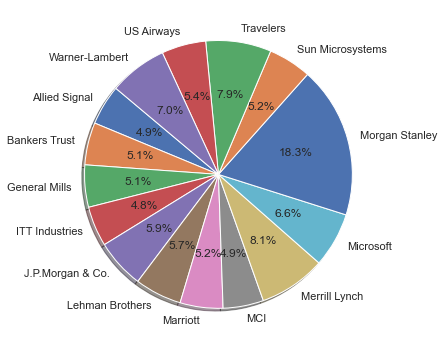

In [96]:
#pie plot
Name_of_company=df['Name of company']
plt.figure(figsize=(6,8))
plt.pie(percent_col, labels=Name_of_company,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

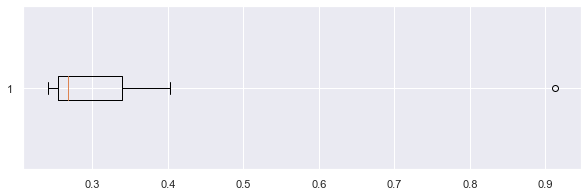

In [103]:
#outliers
plt.figure(figsize = (10,3));
plt.boxplot(df.percent, vert= False)
plt.show()

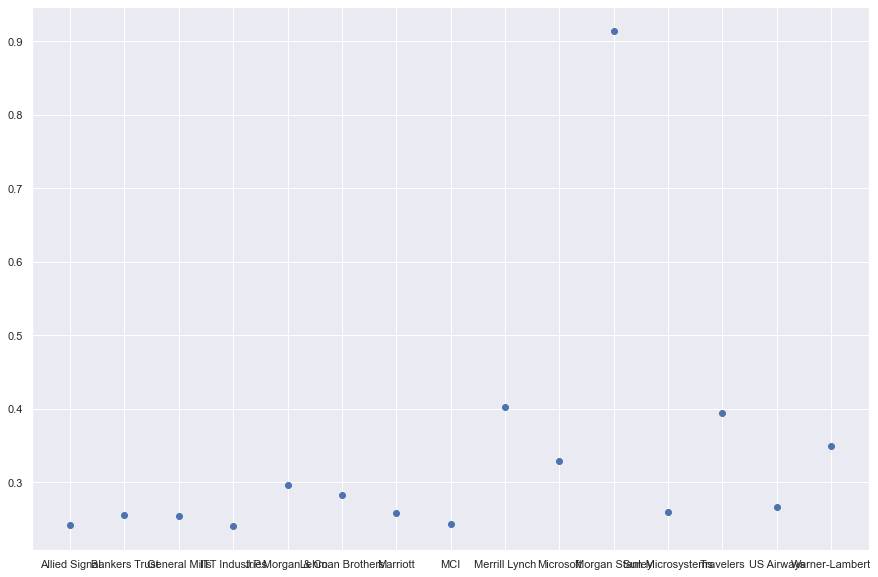

In [101]:
fig = plt.scatter(x=Name_of_company, y=percent_col)

In [118]:
# from graph we can say that 91.36% is the outlier

In [105]:
# to cal using Quantile Ranges

In [106]:
Q1 = np.quantile(percent_col,0.25)
Q3 = np.quantile(percent_col,0.75)

In [107]:
med = np.median(percent_col)
med

0.2671

In [108]:
IQR = Q3 - Q1

In [109]:
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)

In [114]:
print('First Quantile=', Q1,'\n','Second Quantile=', med ,'\n','Third Quantile=', Q3,'\n',
      'Inter-Quartile Range=', IQR, '\n','Upper Whisker=', upper_bound, '\n','Lower Whisker=', lower_bound)

First Quantile= 0.25470000000000004 
 Second Quantile= 0.2671 
 Third Quantile= 0.33975 
 Inter-Quartile Range= 0.08504999999999996 
 Upper Whisker= 0.46732499999999993 
 Lower Whisker= 0.1271250000000001


In [117]:
Outliers = percent_col[(percent_col <= lower_bound) | (percent_col >= upper_bound)]*100
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 10    91.36
Name: Measure X, dtype: float64


### Question 2 

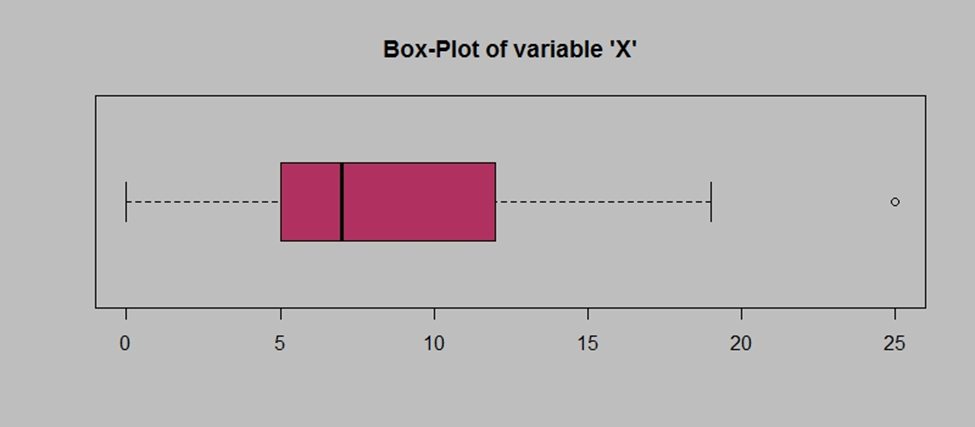
Answer the following three questions based on the box-plot above

(i) What is inter-quartile range of this dataset? (please approximate the numbers) In one line, explain what this value implies.

Q1=5, Q3=12.5(approx), so IQR=Q3-Q1=7.5(approx). This value gives the range or spread of the middle 50% of the observationsi.e.the middle 50% of observations is spread out over an interval of 7.5.

(ii) What can we say about the skewness of this dataset?

The dataset is positively skewed or right skewed.Mean is less than median, so the box plot is Right skewed

iii)	If it was found that the data point with the value 25 is actually 2.5, how would the new box-plot be affected?

if the data point 25 was actually 2.5, it would not affect the new boxplot as median is plotted in the boxplot not mean.The only difference will be there will be no outliers in the new boxplot.

### Question 3

3.	
 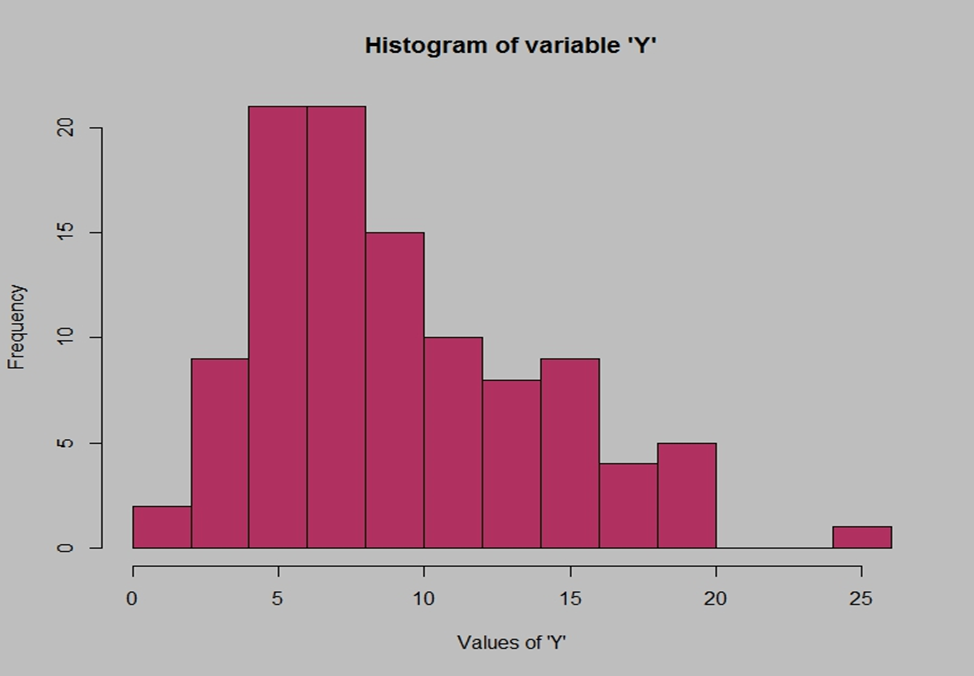

Answer the following three questions based on the histogram above.

(i) Where would the mode of this dataset lie?

Ans:The mode of this dataset will lie approx between 4.8-8.0

(ii) Comment on the skewness of the dataset.

Ans: Right skewed, as long tail towards Right. 

(iii)Suppose that the above histogram and the box-plot in question 2 are plotted for the same dataset. Explain how these graphs complement each other in providing information about any dataset.

Ans: Both Plots give idea about skewness of the data, But

Box plot provides outlier values, which fails to provide by histogram.
Similarly histogram provides the frequency of datapoints, which fails to provide by box plot.

Both boxplot and histogram gives an idea of the skewness and presence of outliers in a dataset

### Question 4 

AT&T was running commercials in 1990 aimed at luring back customers who had switched to one of the other long-distance phone service providers. One such commercial shows a businessman trying to reach Phoenix and mistakenly getting Fiji, where a half-naked native on a beach responds incomprehensibly in Polynesian. When asked about this advertisement, AT&T admitted that the portrayed incident did not actually take place but added that this was an enactment of something that “could happen.” Suppose that one in 200 long-distance telephone calls is misdirected. What is the probability that at least one in five attempted telephone calls reaches the wrong number? (Assume independence of attempts.)

In [128]:
'''
Ans: E: The call is misdirected
then probability of the event E is
P(E)= 1/200 
Therefore,
Probability that at least one in 5 attempted call reaches the wrong number
= 1 - Probability that no attempted call reaches the wrong number
= 1 – P(E bar)
= 1 – (199/200)* (199/200)* (199/200)* (199/200)* (199/200)
= 1 - (199/200)^5
= 0.025
'''

'\nAns: E: The call is misdirected\nthen probability of the event E is\nP(E)= 1/200 \nTherefore,\nProbability that at least one in 5 attempted call reaches the wrong number\n= 1 - Probability that no attempted call reaches the wrong number\n= 1 – P(E bar)\n= 1 – (199/200)* (199/200)* (199/200)* (199/200)* (199/200)\n= 1 - (199/200)^5\n= 0.025\n'

Probability that at least one in 5 attempted call reaches the wrong number = 0.025

### Question 5 

Returns on a certain business venture, to the nearest $1,000, are known to follow the following probability distribution.

  
x|P(x)
----|----
-2,000|0.1
-1,000|0.1
0|0.2
1000|0.2
2000|0.3
3000|0.1
 
    i.What is the most likely monetary outcome of the business venture?
    ii.Is the venture likely to be successful? Explain
    iii.What is the long-term average earning of business ventures of this kind? Explain
    iv.What is the good measure of the risk involved in a venture of this kind? Compute this measure



    i.most likely monetary outcome= Value of X corresponding to highest P=0.3= 2000
    
    ii.The success of venture can be found out by adding all positive probabilities =0.2+0.3+0.1=  0.6
    So there is a 60% chance of success.
    
    iii. Long term average earning= sum of expected values= 800$
    
    iv. A good measure of risk involved is standard deviation.
    variance = 2160000  ( Quite High)
    Standard deviation= 1469.69$
    As Variability is Quite high  hence Risk is high



# Set 2

### Question-1

The time required for servicing transmissions is normally distributed with u = 45 minutes and s= 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment?

for normal distribution :-
z = (X-μ)/б

= (50-45)/8        

= 0.625

In [135]:
from scipy import stats


In [143]:
# probability car will be ready within 1 hr
stats.norm.cdf( 50,loc = 45,scale = 8)

0.7340144709512995

In [142]:
# probability car will not be ready within 1 hr
1-stats.norm.cdf( 50,loc = 45,scale = 8)

0.26598552904870054

So correct answer is 0.266

### Question-2

The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean u= 38 and Standard deviation s =6. For each statement below, please specify True/False. If false, briefly explain why.

A. More employees at the processing center are older than 44 than between 38 and 44.

In [147]:
# probability employees are older than 44
1-stats.norm.cdf( 44,loc = 38,scale = 6)

0.15865525393145707

In [148]:
# probability employees are between 38 and 44
prob=stats.norm.cdf( 44,loc = 38,scale = 6)-stats.norm.cdf( 38,loc = 38,scale = 6)
prob

0.3413447460685429

15.9% of employees are above 44 while 34.13% of employees are between 38 to 44.So statement A is False.

B. A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.


In [151]:
# probability that training employees are under 30
stats.norm.cdf( 30,loc = 38,scale = 6)

0.09121121972586788

So 9.12 percent of employees are under 30.Total employees= 400

So number of employees under 30= 36.48 = 36(round off)

So statement B is TRUE

### Question-3

If X1 ~ N(μ, σ^2) and X2 ~ N(μ, σ^2) are iid normal random variables, then what is the difference between 2 X1 and X1 + X2? Discuss both their distributions and parameters.       


X1 -- N(μ, σ2) 

X2 -- N(μ, σ2) 
As X1 and X2 are independent,identically distributed(iid) normal random variables,
by Central Limit Theorem,

X1 + X2 -- N(2μ,2σ^2)

And, 2X1 -- N(2μ,4σ^2)

So, 2X1-(X1+X2) --> N(2μ-2μ, 2σ^2+4σ^2 ) --> (0,6σ^2)

2X1 distribution has a mean of 2μ and variance=4σ^2 .

X1 + X2 distribution has mean= 2μ and variance= 2σ^2 .

And their difference has mean =0 and variance= 6σ^2.
                

### Question-4

Let X ~ N(100, 20^2). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99. 


In [156]:
'''
The Probability of getting value between a and b should be 0.99.
So probability of not getting between a and b= 1-0.99= 0.01
Area on the left of a= Area on the right of b= 0.005
'''
import numpy as np
z_score_a=stats.norm.ppf(0.005,loc=0,scale=1)
z_score_a=np.round(z_score_a,3)
print(z_score_a)

-2.576


In [159]:
# So z-score for b will be +2.576
z_score_b= 2.576
u=100
s=20
a=z_score_a*s+u
b=z_score_b*s+u
print('a=',a,'\nb=',b)

a= 48.48 
b= 151.52


option D is Correct.

### Question- 5

Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 3^2) and Profit2 ~ N(7, 4^2) respectively. Both the profits are in million dollars. Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45.

A. Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.

In [165]:
'''
Profit1 ~ N(5, 3^2)
Profit2 ~ N(7, 4^2)

So Overall Profit ~ N(12,25)
'''
mean= 12
sd=5
mean_rs= 12*45
sd_rs= 5*45

print(mean_rs,sd_rs)

540 225


So mean profit from two divisions is 540 million rupees.
Standard deviation of mean profit is 225 million rupees

In [168]:
#  rupee range such that it contains 95% probability for annual profit
stats.norm.interval(0.95,540,225)

(99.00810347848784, 980.9918965215122)

So rupee range is 99 million to 981 million.

B.Specify the 5th percentile of profit (in Rupees) for the company

In [172]:
'''
5th percentile= area of 0.05 in normal distribution curve
calculating z score for corresponding probability
'''

stats.norm.ppf(0.05,loc=0,scale=1)

-1.6448536269514729

In [173]:
z= -1.65
fifth_percentile=z*sd_rs+mean_rs
print("Fifth percentile of profit in million rupees:",fifth_percentile)

Fifth percentile of profit in million rupees: 168.75


C.Which of the two divisions has a larger probability of making a loss in a given year?


In [175]:
# Probability of Division 1 making loss 
np.round(stats.norm.cdf(0,5,3),3)

0.048

In [176]:
# Probability of Division 2 making loss 
np.round(stats.norm.cdf(0,7,4),3)

0.04

Division 1 has more probability of loss

# SET- 3

### 1. For each of the following statements, indicate whether it is True/False. If false, explain why.

    I. The sample size of the survey should at least be a fixed percentage of the population size in order to produce representative results.
    FALSE- Though a sample size is considered large but it will not be adequate for large population
 

    II. The sampling frame is a list of every item that appears in a survey sample, including those that did not respond to questions.
    FALSE- Only those who responded can be part of sampling frame.

    III. Larger surveys convey a more accurate impression of the population than smaller surveys.
    TRUE- Larger surveys means less margin of error and more accurate representation of population.

### 2. PC Magazine asked all of its readers to participate in a survey of their satisfaction with different brands of electronics. In the 2004 survey, which was included in an issue of the magazine that year, more than 9000 readers rated the products on a scale from 1 to 10. The magazine reported that the average rating assigned by 225 readers to a Kodak compact digital camera was 7.5. For this product, identify the following:


    A. The population- All the readers
    B. The parameter of interest- average rating of Kodak compact digital camera
    C. The sampling frame-9000
    D. The sample size-225
    E. The sampling design- random sampling
    F. Any potential sources of bias or other problems with the survey or sample- The sample size is very small so will lead to biased rating.

### 3. For each of the following statements, indicate whether it is True/False. If false, explain why.

    I. If the 95% confidence interval for the average purchase of customers at a department store is 50$ to 110$,then 100$ is a plausible value for the population mean at this level of confidence.
TRUE

    II. If the 95% confidence interval for the number of moviegoers who purchase concessions is 30% to 45%, this means that fewer than half of all moviegoers purchase concessions.
    FALSE- Fewer than half of 95% moviegoers purchase concessions.

    III. The 95% Confidence-Interval for μ only applies if the sample data are nearly normally distributed.
    TRUE

### 4. What are the chances that x bar greater than u?
Mean of Sample means= Population mean.

So chance= 1(answer D)


### 5. In January 2005, a company that monitors Internet traffic (WebSideStory) reported that its sampling revealed that the Mozilla Firefox browser launched in 2004 had grabbed a 4.6% share of the market.

A.If the sample were based on 2,000 users, could Microsoft conclude that Mozilla has a less than 5% share of the market?

Null Hypothesis- Mozilla shares more than 5%
Alternate Hypothesis- Mozilla shares less than 5%

In [182]:
import numpy as np
from scipy import stats
z_scores=(0.046-0.05)/(np.sqrt((0.05*(1-0.05))/2000))
p_value=1-stats.norm.cdf(abs(z_scores))
p_value

0.20588503245107104

As p-value > 0.05 we will accept Null Hypothesis.So market shares of Mozilla is more than 5%.

B.WebSideStory claims that its sample includes all the daily Internet users. If that’s the case, then can Microsoft conclude that Mozilla has a less than 5% share of the market?

According to WebSideStory,its sample includes all the daily Internet users. So 4.6% is the population percentage. Hence Microsoft's claim that Mozilla has a less than 5% share of the whole market is True. Hence, we can conclude that Mozilla has a less than 5% share of the market.

### 6. A book publisher monitors the size of shipments of its textbooks to university bookstores. For a sample of texts used at various schools, the 95% confidence interval for the size of the shipment was 250 ± 45 books. Which, if any, of the following interpretations of this interval are correct?

    A. All shipments are between 205 and 295 books.
    FALSE

    B. 95% of shipments are between 205 and 295 books.
    TRUE

    C. The procedure that produced this interval generates ranges that hold the population mean for 95% of samples.
    TRUE

    D. If we get another sample, then we can be 95% sure that the mean of this second sample is between 205 and 295.
    TRUE

    E. We can be 95% confident that the range 160 to 340 holds the population mean.
    FALSE

### 7. Which is shorter: a 95% z-interval or a 95% t-interval for μ if we know that σ =s?

The z-interval is shorter

### 8. How many randomly selected employers (minimum number) must we contact in order to guarantee a margin of error of no more than 4% (at 95% confidence)?

Here, n=number of employers

P=0.5,1-p =0.5 ,Margin of Error(ME)=0.04

For 95% CI, z= 1.96

ME = z* [p(1-p)/n]^0.5

So n= 600.25 = 600
So answer is A

### 9. Suppose we want the above margin of error to be based on a 98% confidence level. What sample size (minimum) must we now use?

For 98% CI, z= 2.326
P=0.5,1-p =0.5 ,Margin of Error(ME)=0.04

n= 845.35 
So correct answer is C.


# SET- 4